#  EXAMPLE 1: Inspect data and plot SPOD spectrum.
The large-eddy simulation data provided along with this example is a
subset of the database of a Mach 0.9 turbulent jet described in [1] and
was calculated using the unstructured flow solver Charles developed at
Cascade Technologies. If you are using the database in your research or
teaching, please include explicit mention of Brès et al. [1]. The test
database consists of 5000 snapshots of the symmetric component (m=0) of
a round turbulent jet. A physical interpretaion of the SPOD results is
given in [2], and a comprehensive discussion and derivation of SPOD and
many of its properties can be found in [3].


## References:
1. G. A. Brès, P. Jordan, M. Le Rallic, V. Jaunet, A. V. G.Cavalieri, A. Towne, S. K. Lele, T. Colonius, O. T. Schmidt, Importance of the nozzle-exit boundary-layer state in subsonic turbulent jets, J. of Fluid Mech. 851, 83-124, 2018
2. Schmidt, O. T. and Towne, A. and Rigas, G. and Colonius, T. and Bres, G. A., Spectral analysis of jet turbulence, J. of Fluid Mech. 855, 953–982, 2018
3. Towne, A. and Schmidt, O. T. and Colonius, T., Spectral proper orthogonal decomposition and its relationship to dynamic mode decomposition and resolvent analysis, J. of Fluid Mech. 847, 821–867, 2018

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from spod import spod

### Load the test database.
'p' is the data matrix, 'x' and 'r' are the axial and radial coordinates, respectively.

In [2]:
f = h5py.File("jet_data/jetLES.mat", "r")
p = np.swapaxes(f["p"], 0, 2)
x = np.swapaxes(f["x"], 0, 1)
r = np.swapaxes(f["r"], 0, 1)

### Inspect the database.
The jet is resolvend by 39 points in the radial and by 175 points in the axial direction. To use the spod() function, it is important that the first dimension of the data is time, i.e. 5000 snapshots in this example. If your data is sorted differently, please change indices.

In [3]:
p.shape

(5000, 39, 175)

### Plot the first frame of the pressure field.

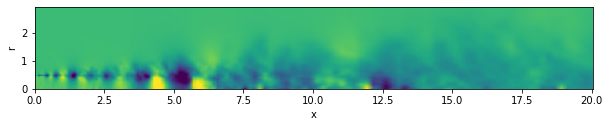

In [4]:
fig1 = plt.figure(figsize=(10,5))
plt.xlabel("x")
plt.ylabel("r")
cax = plt.pcolormesh(
    x, r, p[0, :, :], shading="gouraud", cmap="viridis", vmin=4.43, vmax=4.48
)
plt.axis("scaled");

### Calculate the SPOD spectrum of the data.
Check the output of spod() in the console after execution: the routine has segmented the data into 38 blocks of 256 snapshots each. The segments, or blocks, overlap 50%, i.e. 128 snaphots overlap.

In [5]:
result = spod(p, debug=1)


SPOD parameters
------------------------------------
Spectrum type             : one-sided (real-valued signal)
No. of snaphots per block : 256
Block overlap             : 128
No. of blocks             : 38
Windowing fct. (time)     : Hamming
Weighting fct. (space)    : uniform
Mean                      : long-time (true) mean

Calculating temporal DFT
------------------------------------

Calculating SPOD
------------------------------------


### Plot SPOD energy by mode

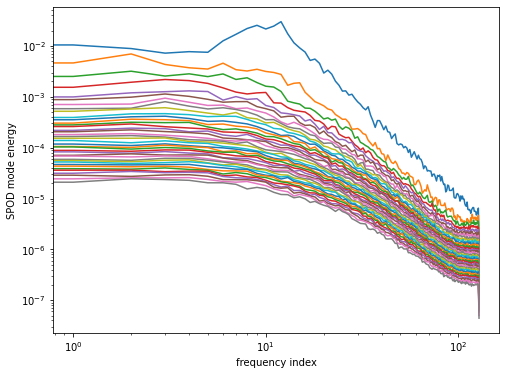

In [6]:
plt.figure(figsize=(8,6))
plt.loglog(result["L"])
plt.xlabel("frequency index")
plt.ylabel("SPOD mode energy")
plt.show()